/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

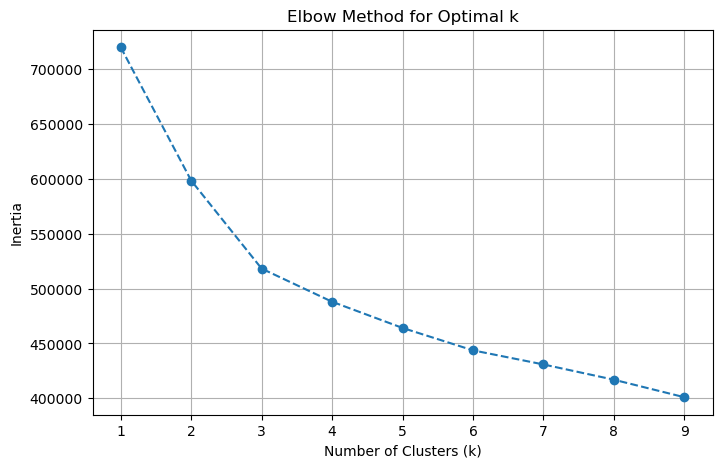

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Credit,Sex,Education,Status,Age,Repayment 6,Repayment 5,Repayment 4,Repayment 3,...,Amount 4,Amount 3,Amount 2,Amount 1,Previous 6,Previous 5,Previous 4,Previous 3,Previous 2,Previous 1
label,,,,,,,,,,,,,,,,,,,,,
0,14932.758113,220377.680774,1.647561,1.674037,1.503226,36.419719,-0.764377,-1.146707,-1.223857,-1.265231,...,6752.225754,6130.704783,6332.491554,6527.506168,4861.837066,5439.317043,5046.559119,4897.201082,4830.149934,5526.865155
1,14919.073141,105969.456014,1.581977,1.983403,1.595166,34.512621,0.419412,0.459485,0.455068,0.389562,...,40742.295848,36853.402625,33839.411902,32565.861984,3744.621229,3590.536855,3062.802158,2859.410009,2925.597943,3120.506121
2,15554.746128,282908.650442,1.571350,1.804204,1.503872,37.026272,0.251106,0.218473,0.193584,0.149336,...,191824.465985,179564.182522,167696.601770,160765.293971,16409.321903,17538.643529,15225.841261,13237.110066,12921.040929,13488.780973


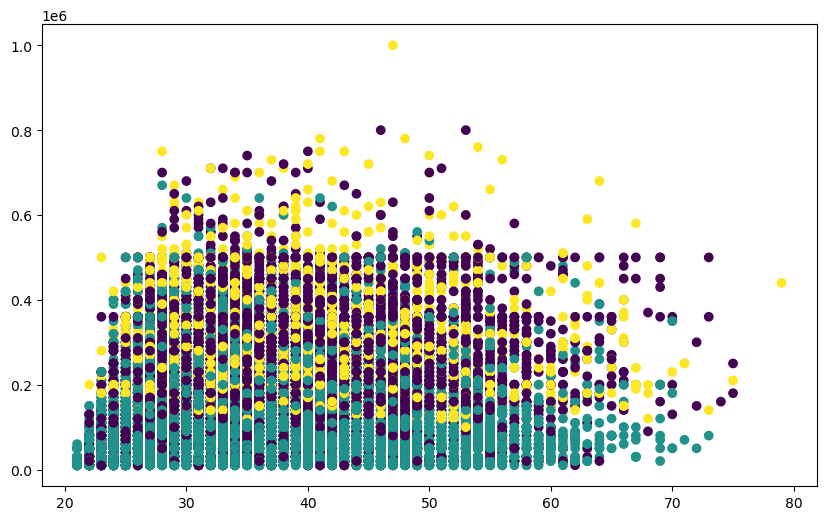

In [14]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
df = pd.read_excel("data_clustering.xlsx")
raw_data = df

# clean data
df_cleaned = df.dropna()

# scale data
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# elbow method
inertia_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

# run Kmeans:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
numeric_columns = df_cleaned.columns.tolist()
df_scaled['label'] = kmeans.labels_
df_cleaned['label'] = kmeans.labels_

# visualize data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_cleaned['Age'], df_cleaned['Credit'], c=df_cleaned['label'], cmap='viridis')


stat_clusters = df_cleaned.groupby('label')[numeric_columns].mean()

stat_clusters.head()